In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import uproot
import awkward as ak

for i in range(0, 10):
    output_path = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/parallelisation_test/df" + str(i) + ".csv"
    trackstates_path = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/parallelisation_test/" + str(i) + "/trackstates_fitter.root"
    tracksummary_path = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/parallelisation_test/" + str(i) + "/tracksummary_fitter.root"

    file = uproot.open(trackstates_path)
    tree_input = file["trackstates"]

    X_TRUTH = ak.to_numpy(ak.pad_none(tree_input["t_x"].array(), target = 6, clip=True)).filled(np.nan)
    GLOBAL_X_HIT = ak.to_numpy(ak.pad_none(tree_input["g_x_hit"].array(), target = 6, clip=True)).filled(np.nan)
    LOCAL_X_HIT = ak.to_numpy(ak.pad_none(tree_input["l_x_hit"].array(), target = 6, clip=True)).filled(np.nan)

    Y_TRUTH = ak.to_numpy(ak.pad_none(tree_input["t_y"].array(), target = 6, clip=True)).filled(np.nan)
    GLOBAL_Y_HIT = ak.to_numpy(ak.pad_none(tree_input["g_y_hit"].array(), target = 6, clip=True)).filled(np.nan)
    LOCAL_Y_HIT = ak.to_numpy(ak.pad_none(tree_input["l_y_hit"].array(), target = 6, clip=True)).filled(np.nan)

    Z_TRUTH = ak.to_numpy(ak.pad_none(tree_input["t_z"].array(), target = 6, clip=True)).filled(np.nan)
    GLOBAL_Z_HIT = ak.to_numpy(ak.pad_none(tree_input["g_z_hit"].array(), target = 6, clip=True)).filled(np.nan)

    file.close()

    file = uproot.open(tracksummary_path)
    tree_input = file["tracksummary"]

    QOP_FIT = ak.to_numpy(ak.flatten(tree_input["eQOP_fit"].array()))
    PHI_FIT = ak.to_numpy(ak.flatten(tree_input["ePHI_fit"].array()))
    THETA_FIT = ak.to_numpy(ak.flatten(tree_input["eTHETA_fit"].array()))

    P_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_p"].array()))
    Q_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_charge"].array()))
    PZ_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_pz"].array()))
    PHI_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_phi"].array()))
    THETA_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_theta"].array()))

    CHI2SUM = ak.to_numpy(ak.flatten(tree_input["chi2Sum"].array()))
    NDF = ak.to_numpy(ak.flatten(tree_input["NDF"].array()))

    file.close()

    P_FIT = Q_TRUTH/QOP_FIT
    PZ_FIT = P_FIT*np.cos(THETA_FIT)

    df_columns = [
                "QOP_FIT", "PHI_FIT", "THETA_FIT", "P_FIT", "PZ_FIT", 
                "P_TRUTH", "Q_TRUTH", "PZ_TRUTH", "PHI_TRUTH", "THETA_TRUTH", 
                "CHI2SUM", "NDF", 
                "X_TRUTH_1", "X_TRUTH_2", "X_TRUTH_3", "X_TRUTH_4", "X_TRUTH_5", "X_TRUTH_6", 
                "GLOBAL_X_HIT_1", "GLOBAL_X_HIT_2", "GLOBAL_X_HIT_3", "GLOBAL_X_HIT_4", "GLOBAL_X_HIT_5", "GLOBAL_X_HIT_6", 
                "LOCAL_X_HIT_1", "LOCAL_X_HIT_2", "LOCAL_X_HIT_3", "LOCAL_X_HIT_4", "LOCAL_X_HIT_5", "LOCAL_X_HIT_6", 
                "Y_TRUTH_1", "Y_TRUTH_2", "Y_TRUTH_3", "Y_TRUTH_4", "Y_TRUTH_5", "Y_TRUTH_6", 
                "GLOBAL_Y_HIT_1", "GLOBAL_Y_HIT_2", "GLOBAL_Y_HIT_3", "GLOBAL_Y_HIT_4", "GLOBAL_Y_HIT_5", "GLOBAL_Y_HIT_6", 
                "LOCAL_Y_HIT_1", "LOCAL_Y_HIT_2", "LOCAL_Y_HIT_3", "LOCAL_Y_HIT_4", "LOCAL_Y_HIT_5", "LOCAL_Y_HIT_6", 
                "Z_TRUTH_1", "Z_TRUTH_2", "Z_TRUTH_3", "Z_TRUTH_4", "Z_TRUTH_5", "Z_TRUTH_6", 
                "GLOBAL_Z_HIT_1", "GLOBAL_Z_HIT_2", "GLOBAL_Z_HIT_3", "GLOBAL_Z_HIT_4", "GLOBAL_Z_HIT_5", "GLOBAL_Z_HIT_6"
    ]

    df_data = [
                QOP_FIT, PHI_FIT, THETA_FIT, P_FIT, PZ_FIT,
                P_TRUTH, Q_TRUTH, PZ_TRUTH, PHI_TRUTH, THETA_TRUTH, 
                CHI2SUM, NDF, 
                X_TRUTH[:,0], X_TRUTH[:,1], X_TRUTH[:,2], X_TRUTH[:,3], X_TRUTH[:,4], X_TRUTH[:,5], 
                GLOBAL_X_HIT[:,0], GLOBAL_X_HIT[:,1], GLOBAL_X_HIT[:,2], GLOBAL_X_HIT[:,3], GLOBAL_X_HIT[:,4], GLOBAL_X_HIT[:,5], 
                LOCAL_X_HIT[:,0], LOCAL_X_HIT[:,1], LOCAL_X_HIT[:,2], LOCAL_X_HIT[:,3], LOCAL_X_HIT[:,4], LOCAL_X_HIT[:,5], 
                Y_TRUTH[:,0], Y_TRUTH[:,1], Y_TRUTH[:,2], Y_TRUTH[:,3], Y_TRUTH[:,4], Y_TRUTH[:,5], 
                GLOBAL_Y_HIT[:,0], GLOBAL_Y_HIT[:,1], GLOBAL_Y_HIT[:,2], GLOBAL_Y_HIT[:,3], GLOBAL_Y_HIT[:,4], GLOBAL_Y_HIT[:,5], 
                LOCAL_Y_HIT[:,0], LOCAL_Y_HIT[:,1], LOCAL_Y_HIT[:,2], LOCAL_Y_HIT[:,3], LOCAL_Y_HIT[:,4], LOCAL_Y_HIT[:,5], 
                Z_TRUTH[:,0], Z_TRUTH[:,1], Z_TRUTH[:,2], Z_TRUTH[:,3], Z_TRUTH[:,4], Z_TRUTH[:,5], 
                GLOBAL_Z_HIT[:,0], GLOBAL_Z_HIT[:,1], GLOBAL_Z_HIT[:,2], GLOBAL_Z_HIT[:,3], GLOBAL_Z_HIT[:,4], GLOBAL_Z_HIT[:,5]
    ]

    df = pd.DataFrame(data=np.column_stack(df_data), columns=df_columns)
    df.to_csv(output_path)

In [3]:
df0 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/parallelisation_test/df0.csv", index_col=0)
df1 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/parallelisation_test/df1.csv", index_col=0)
df2 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/parallelisation_test/df2.csv", index_col=0)
df3 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/parallelisation_test/df3.csv", index_col=0)
df4 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/parallelisation_test/df4.csv", index_col=0)
df5 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/parallelisation_test/df5.csv", index_col=0)
df6 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/parallelisation_test/df6.csv", index_col=0)
df7 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/parallelisation_test/df7.csv", index_col=0)
df8 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/parallelisation_test/df8.csv", index_col=0)
df9 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/parallelisation_test/df9.csv", index_col=0)


In [8]:
from scipy.stats import norm

def Residual_Plot(x, label = "", save = False, bins=100):
    """
    Residual_Plot takes a 1D input of data and plots it as a frequency density histogram, overlaying a fitted normal distribution.

    Inputs
    x: 1D input data, Pandas series or Numpy array
    label: adds labels to the x axis and file name if save is set to true, string
    save: if True will save the plot as label_residual_plot.png, boolean
    bins: number of bins for the histogram, integer

    Returns
    mu: the mean of the fitted normal distribution, float
    std: the standard deviation of the fitted normal distribution, float
    fig: the matplotlib figure containing the final graph, matplotlib figure
    """

    x = x[~np.isnan(x)]

    mu, std = norm.fit(x)

    norm_x = np.arange(start = np.min(x), stop = np.max(x), step = 0.0001)
    norm_y = norm.pdf(norm_x, mu, std)

    fig = plt.figure(figsize = (4, 4), dpi = 200)
    plt.hist(x, bins = bins, density = True)
    plt.plot(norm_x, norm_y)
    
    if label != "":
        plt.xlabel("Residual in " + label)

    plt.ylabel("Frequency Density")
    plt.text(x = -0.5, y = -1.2, s = "Mean : " + str(mu) + " mm" + "\nSigma : " + str(std) + " mm", size = 10)
    plt.show()

    if save == True:
        plt.savfig(label + "_residual_plot.png")

    return mu, std, fig



In [11]:
offsets_y = np.loadtxt("../Gaussian Offset Prediction/offsets_y.csv", delimiter = ",")
offsets_z = np.loadtxt("../Gaussian Offset Prediction/offsets_z.csv", delimiter = ",")

In [20]:
print(offsets_y[0])

[ 0.         -0.08860793  0.08379065 -0.20102708  0.02626479  0.12491603]


In [21]:
print(offsets_y[4])

[ 0.          0.02591092 -0.04124803  0.03945953 -0.16541012  0.15472727]


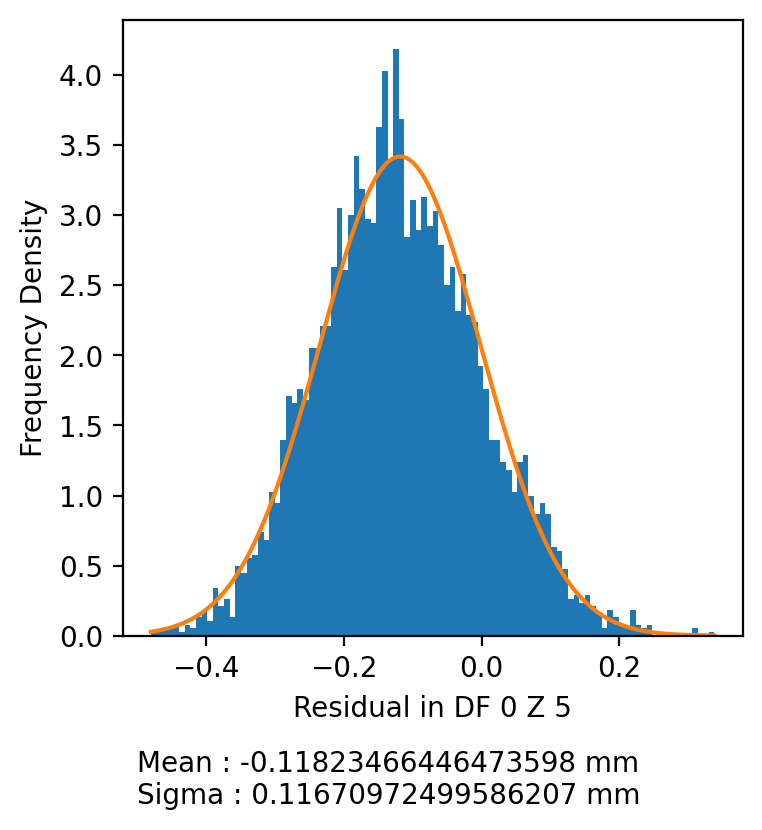

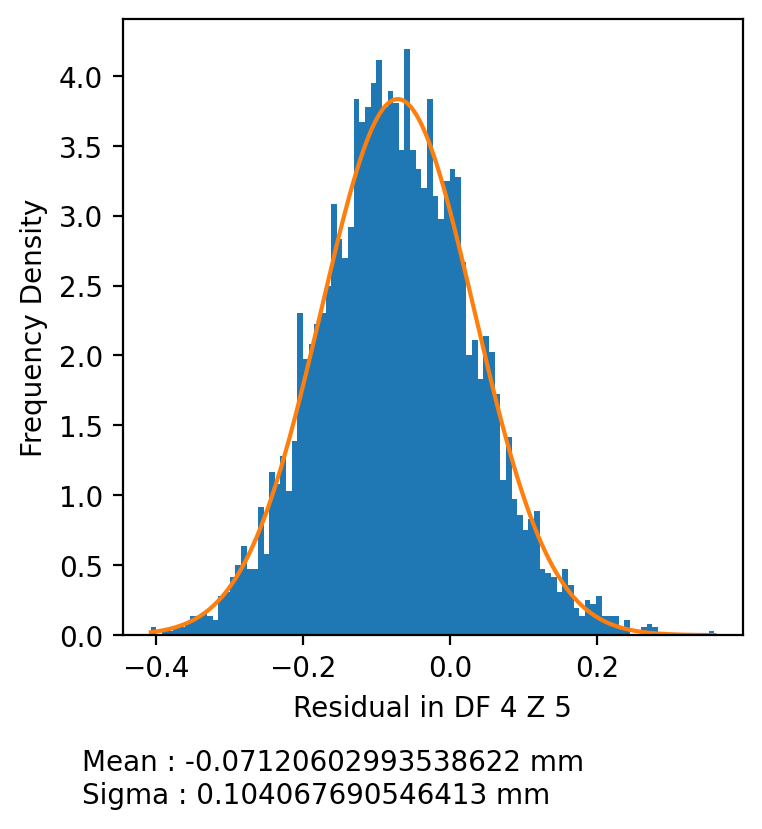

In [25]:
mu, std, fig = Residual_Plot(df0["GLOBAL_Y_HIT_3"] - df0["Y_TRUTH_3"], label = "DF 0 Z 5")
mu, std, fig = Residual_Plot(df4["GLOBAL_Y_HIT_2"] - df4["Y_TRUTH_2"], label = "DF 4 Z 5")

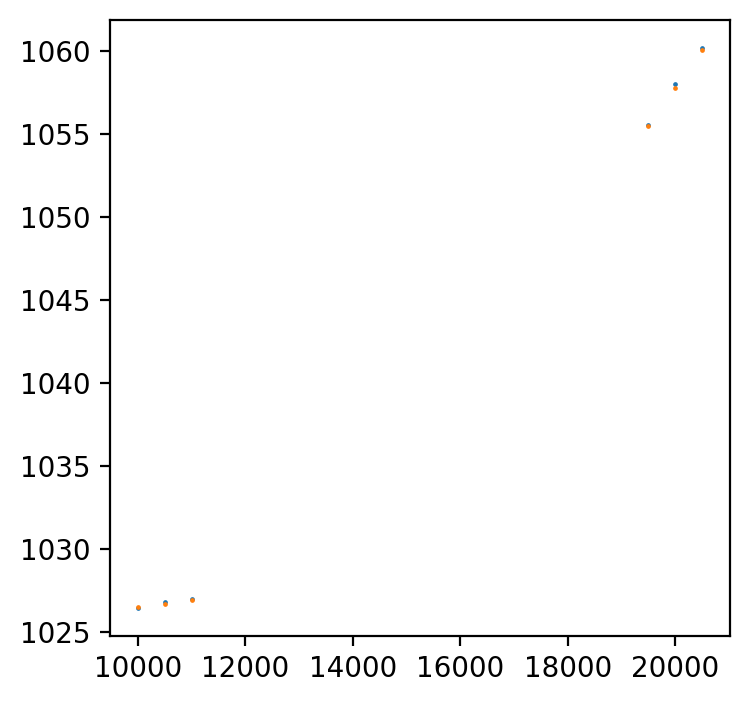

In [30]:
row = 0
plt.figure(figsize = (4, 4), dpi = 200)
for row in range(0, 1):
    plt.scatter(x = [df["X_TRUTH_1"][row], df["X_TRUTH_2"][row], df["X_TRUTH_3"][row], df["X_TRUTH_4"][row], df["X_TRUTH_5"][row], df["X_TRUTH_6"][row]],
                y = [df["GLOBAL_Y_HIT_1"][row], df["GLOBAL_Y_HIT_2"][row], df["GLOBAL_Y_HIT_3"][row], df["GLOBAL_Y_HIT_4"][row], df["GLOBAL_Y_HIT_5"][row], df["GLOBAL_Y_HIT_6"][row]],
                s = 0.5)
    
    plt.scatter(x = [df["X_TRUTH_1"][row], df["X_TRUTH_2"][row], df["X_TRUTH_3"][row], df["X_TRUTH_4"][row], df["X_TRUTH_5"][row], df["X_TRUTH_6"][row]],
                y = [df["Y_TRUTH_1"][row], df["Y_TRUTH_2"][row], df["Y_TRUTH_3"][row], df["Y_TRUTH_4"][row], df["Y_TRUTH_5"][row], df["Y_TRUTH_6"][row]],
                s = 0.5)
plt.show()